In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_excel("collaborative_data.xlsx")
print("Reading data ... done")
#len(data)

Reading data ... done


9260

In [110]:
#choose the temporal variables and the related categs
temporal_data = data[['dyad','participant','start.time', 'end.time', 'duration', 'collaborative.processes']]
temporal_data.to_csv('temporal_data.csv', index=False)
print("Curating data ... done")

Curating data ... done


In [111]:
#PM4PY
import os
from pm4py.objects.log.adapters.pandas import csv_import_adapter
from pm4py.objects.conversion.log import factory as conversion_factory
from pm4py.util import constants

In [137]:
log = conversion_factory.apply(temporal_data, parameters={constants.PARAMETER_CONSTANT_CASEID_KEY: "start.time",
                                                   constants.PARAMETER_CONSTANT_ACTIVITY_KEY: "collaborative.processes",
                                                   constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "end.time"})
print("Creating log ... Done")
print(log[0])

Creating log ... Done
{'events': [{'duration': 2.885, 'participant': 'D20P01', 'collaborative.processes': 'coordinate.teamwork', 'dyad': 'D20', 'start.time': 0.0, 'end.time': 2.885}], 'attributes': {'concept:name': 0.0}}


Mining ... Done


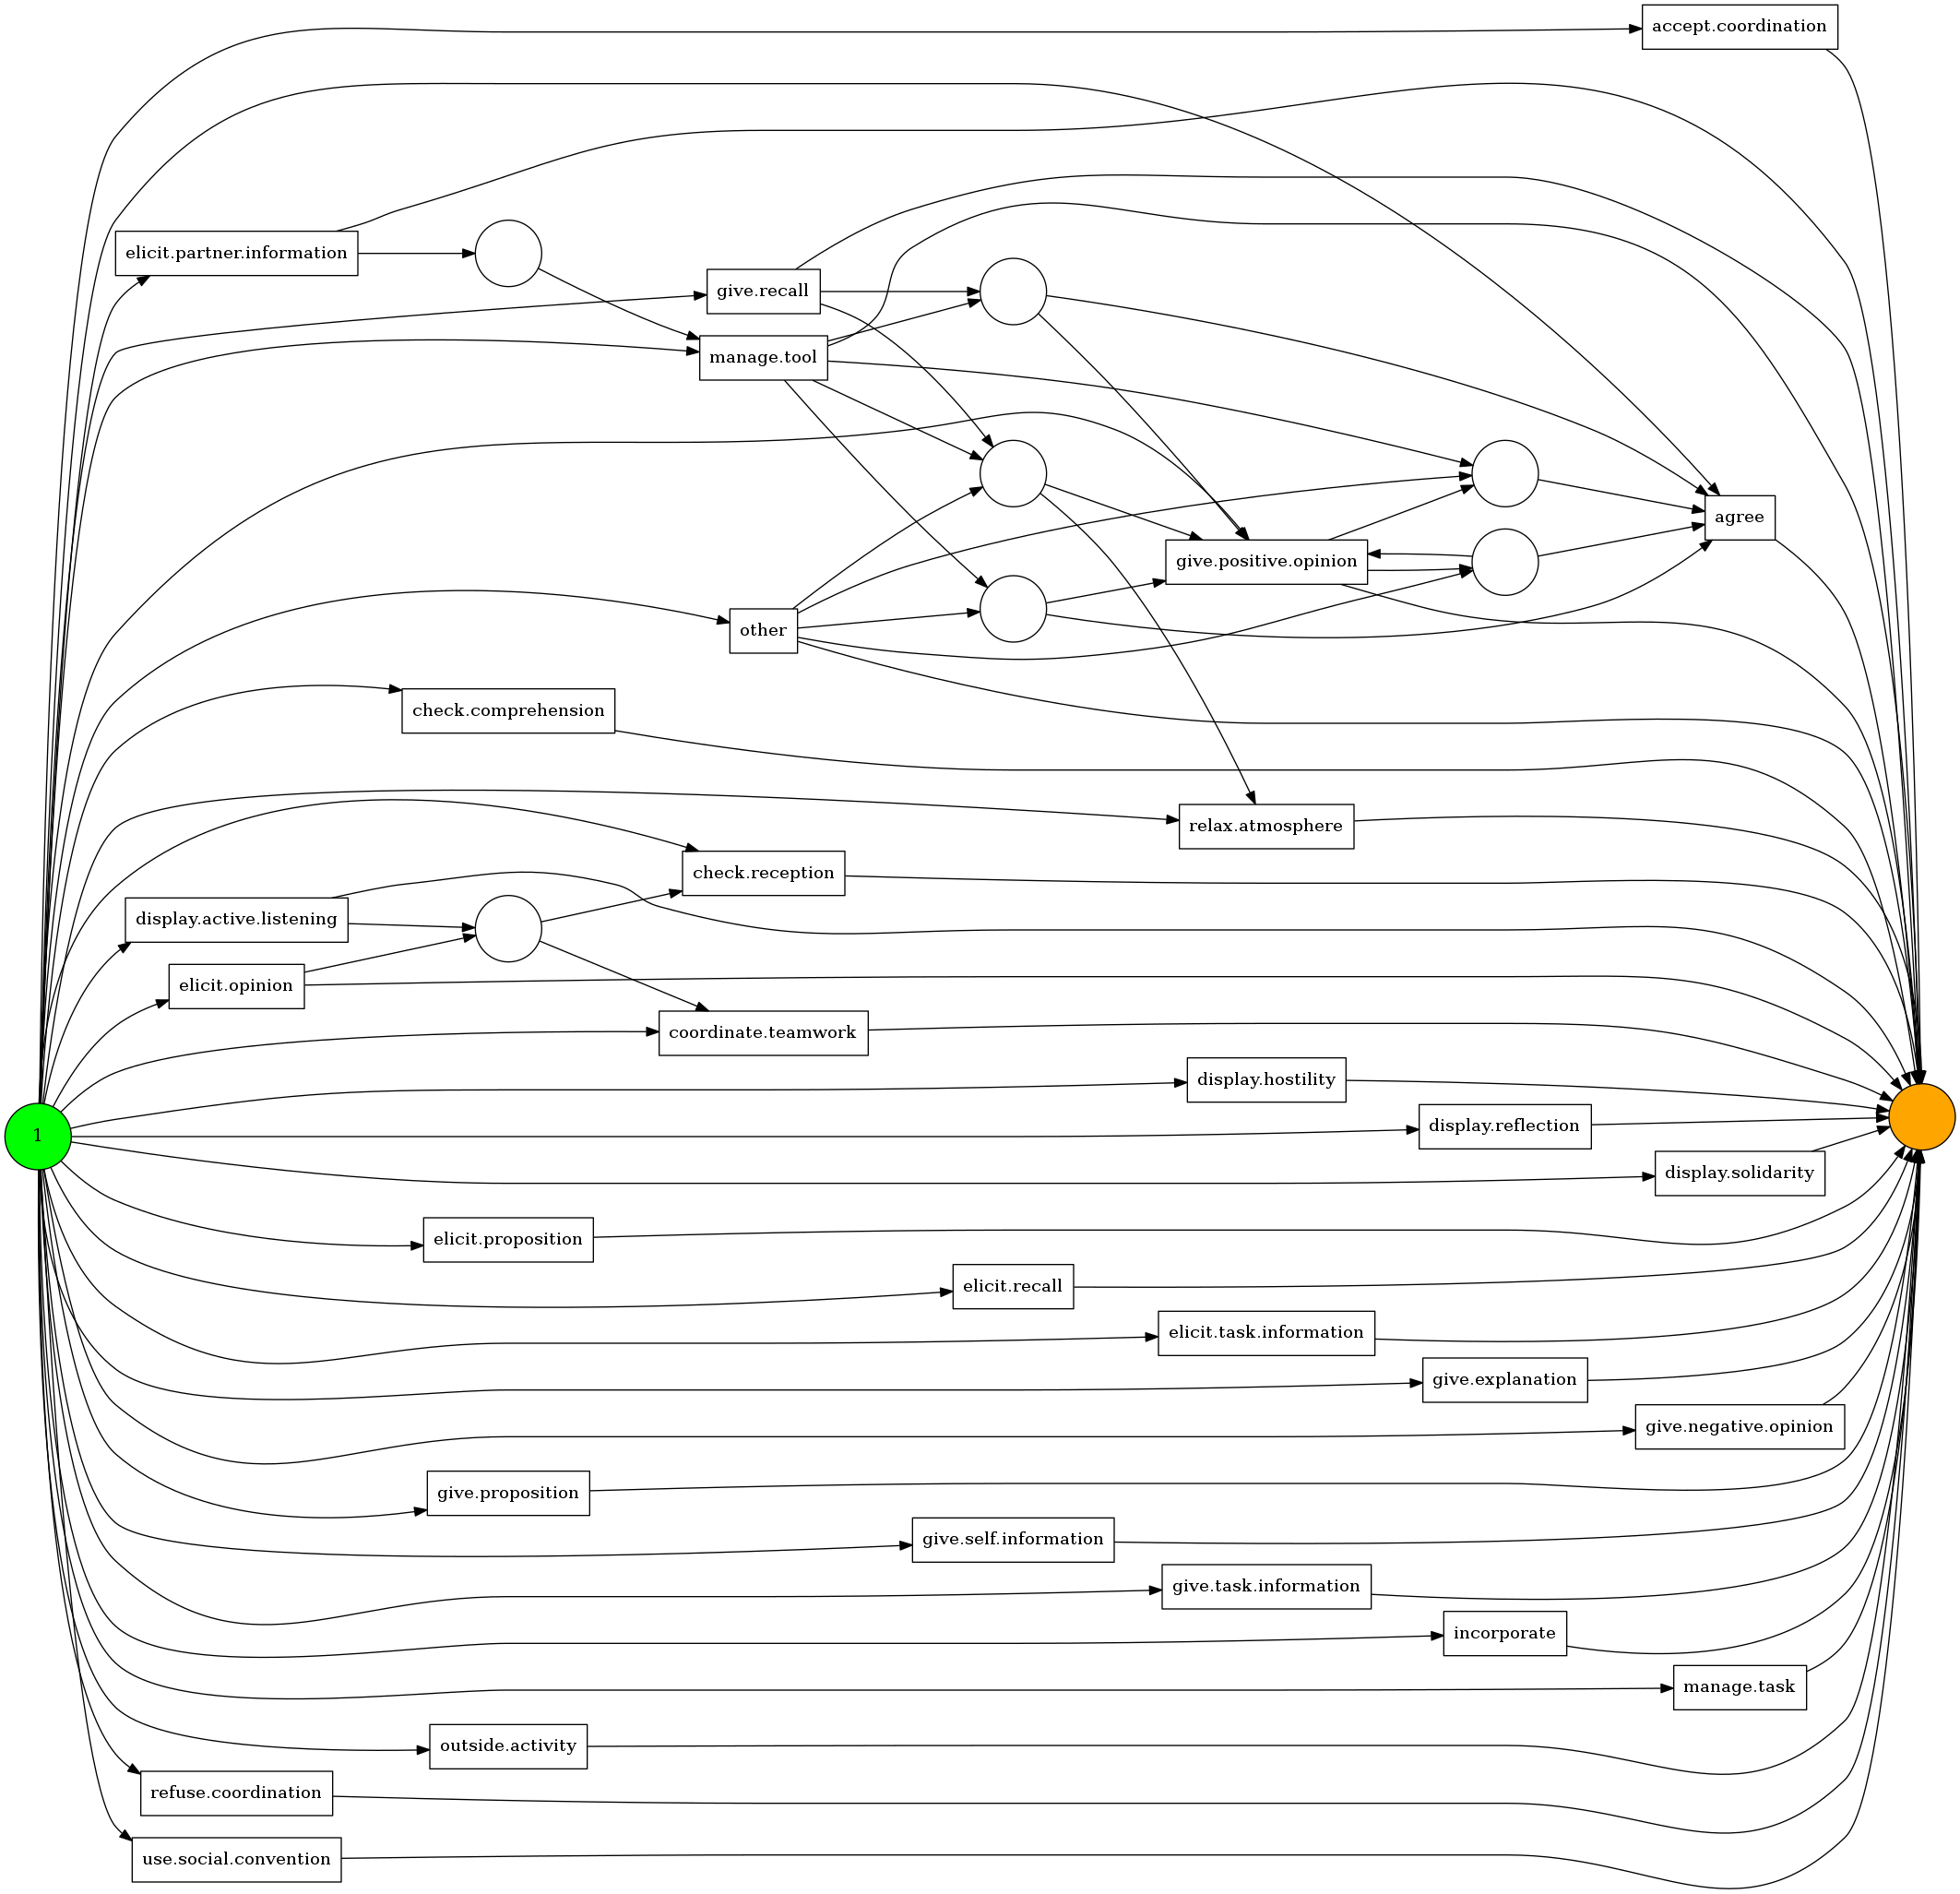

In [140]:
#process discovery
from pm4py.algo.discovery.alpha import factory as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log, parameters={constants.PARAMETER_CONSTANT_CASEID_KEY: "start.time",
                                                      constants.PARAMETER_CONSTANT_ACTIVITY_KEY: "collaborative.processes",
                                                      constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "end.time"})
print("Mining ... Done")

from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz)

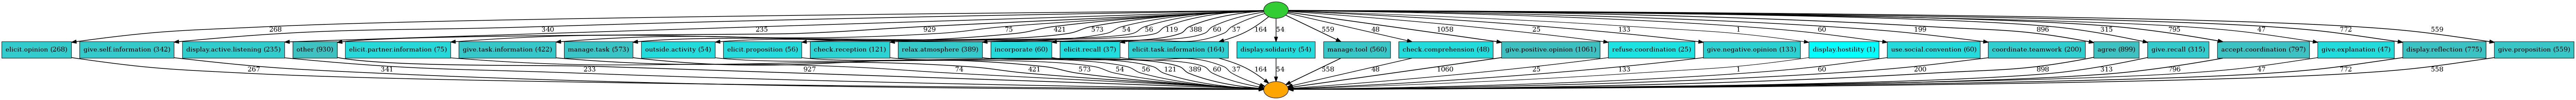

In [136]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.99,constants.PARAMETER_CONSTANT_CASEID_KEY: "start.time",
                                                      constants.PARAMETER_CONSTANT_ACTIVITY_KEY: "collaborative.processes",
                                                      constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "end.time"})

from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)